In [1]:
from sys import path
path.append('..')
import skeleton
from PIL import Image, ImageColor, ImageDraw

In [2]:
class LineDrawer(skeleton.GridUndoableImageProvider):
    OUTPUT_PATH = r"out.jpeg"
    OUTPUT_FORMAT = r"JPEG"
    INVALID_COORDINATE = -1
    
    def __init__(self):
        super().__init__()
        self.__start_x = self.__start_y =  self.INVALID_COORDINATE
    

    def __signum(self, number):
        if number == 0:
            return 0
        return 1 if number > 0 else -1
    

    def __bresenhams_line(self, x0, y0, x1, y1):
        dx, dy = abs(x1 - x0), abs(y1 - y0)
        signum_1, signum_2 = (
                self.__signum(x1 - x0),
                self.__signum(y1 - y0)
        )
        var_swap = False
        
        if (dy > dx):
            dy, dx = dx, dy
            var_swap = True
            
        t = 2 * dy - dx
        for i in range(1, dx):
            super().get_drawer().point((x0, y0),fill='black')
            super().add_to_storage((x0, y0))
            
            while t >= 0:
                if var_swap:
                    x0 += signum_1
                else:
                    y0 += signum_2
                t -= 2*dx
            
            if var_swap:
                y0 += signum_2
            else:
                x0 += signum_1
            t += 2*dy


    def __DDA_line(self, x1, y1, x2, y2):
        steps_count = max(abs(x1 - x2), abs(y1 - y2)) + 1
        x, y = x1, y1
        e, de = 1, 1
        for i in range(steps_count + 1):
            self.get_drawer().point((x,y), fill= 'black')
            super().add_to_storage((x0, y0))
            
            if e >= .5:
                y += 1
                x += 1
                e += de - 1
            else:
                x += 1
                e += de


    def save(self):
        super().get_image().save(self.OUTPUT_PATH, self.OUTPUT_FORMAT)

    
    def reset_start_coordinates(self):
        self.__start_x = self.__start_y = self.INVALID_COORDINATE
        super().clear_storage()
    
    
    def interactive_bresenhams_line(self, x, y, undo_last):
        x, y = self.transform_coords_to_grid((x,y))
        if undo_last:
            super().undo()
            super().clear_storage()

        self.__bresenhams_line(
            self.__start_x,
            self.__start_y,
            x, y
        )
        
    
    def interactive_dda(self, x, y,undo_last):
        x, y = self.transform_coords_to_grid((x,y))
        if undo_last:
            super().undo()
            super().clear_storage()
            
        self.__DDA_line(
            self.__start_x,
            self.__start_y,
            x, y
        )
    
    
    def update_start_coordinates(self, x, y):
        self.__start_x, self.__start_y = self.transform_coords_to_grid((x,y))
        super().clear_storage()

In [3]:
line_drawer = LineDrawer()
frame = skeleton.get_frame('Segment',line_drawer)
events = [
    skeleton.LMB_PRESS,
    skeleton.GRAG_LMB_PRESSED,
    skeleton.LMB_RELEASED
]

handlers = [
    lambda event : line_drawer.update_start_coordinates(event.x, event.y),
    lambda event : line_drawer.interactive_bresenhams_line(event.x, event.y, True),
    lambda event : line_drawer.interactive_bresenhams_line(event.x, event.y, False)
]

frame.bind_handlers(events, handlers)

In [4]:
frame.start()

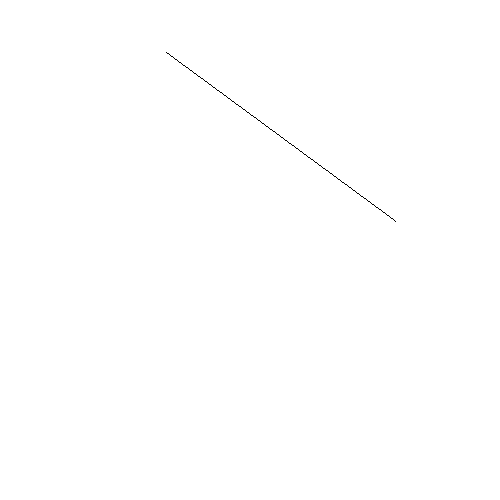

In [5]:
line_drawer.get_image()